In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from tqdm import tqdm
from tqdm.auto import trange
import caffeine

import gezelter_miller as gm

import matplotlib.pylab as plt
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib as mpl
from pylab import rcParams
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
plt.style.use('seaborn')

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
plt.style.use('seaborn-white')

tick_labelsize = 10
axes_labelsize = 25
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize
mpl.rcParams['font.size'] = 20

plots_filename = 'plots/'
data_filename = 'data/'

In [5]:
params_pe, centre_centres, centre_saddles = gm.param_setup()

e_saddle1 = gm.potential_energy(centre_saddles[0,0], centre_saddles[0,1], params_pe)
e_saddle2 = gm.potential_energy(centre_saddles[1,0], centre_saddles[1,1], params_pe)

e_centres = gm.potential_energy(centre_centres[0,0], centre_centres[0,1], params_pe)

print(e_saddle1, e_saddle2)

0.009093080268546412 0.000669734207726363


## Contour plot

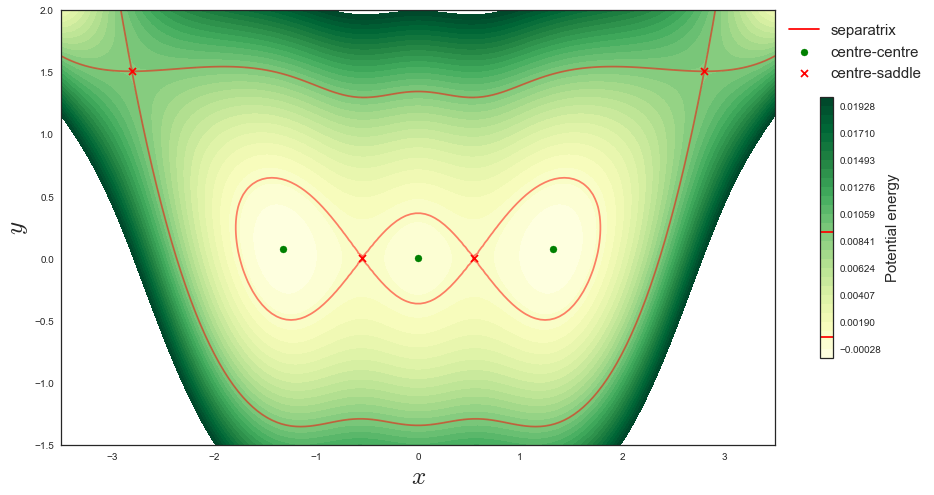

In [59]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

energy_range = [-0.001, 0.02]
energy_levels = np.linspace(energy_range[0], energy_range[1], 30)

# b_box = gm.bounding_box(0.01, params_pe, x_padding = 0.125, y_padding = 0.125)
b_box = np.array([[-3.5, 3.5],[-1.5, 2]])
x_mesh, y_mesh, potential_mesh = gm.meshes(b_box, params_pe)

cont = ax.contourf(x_mesh, y_mesh, potential_mesh, levels = energy_levels, cmap = 'YlGn')
ax.contour(x_mesh, y_mesh, potential_mesh, levels = [e_saddle2, e_saddle1], colors=['r'], alpha = 0.5)
ax.scatter(centre_centres[:,0],centre_centres[:,1], c='g', marker = 'o', label = 'centre-centre')
ax.scatter(centre_saddles[:,0],centre_saddles[:,1], c='r', marker = 'x', label = 'centre-saddle')

ax.plot([-100], [-100], c = 'r', label = 'separatrix')
ax.legend(prop={'size': 15}, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_ylim(b_box[1,:])
ax.set_xlim(b_box[0,:])

cbar = plt.colorbar(cont, ax = ax, shrink=0.6)
cbar.ax.set_ylabel('Potential energy', fontsize=15, rotation=90)
cbar.ax.plot([0,1], (e_saddle2-energy_range[0])/(energy_range[1]-energy_range[0])*np.array([1,1]), c ='r')
cbar.ax.plot([0,1], (e_saddle1-energy_range[0])/(energy_range[1]-energy_range[0])*np.array([1,1]), c ='r')

fig.savefig(plots_filename+'potential_plot')

## Example trajectories for different masses

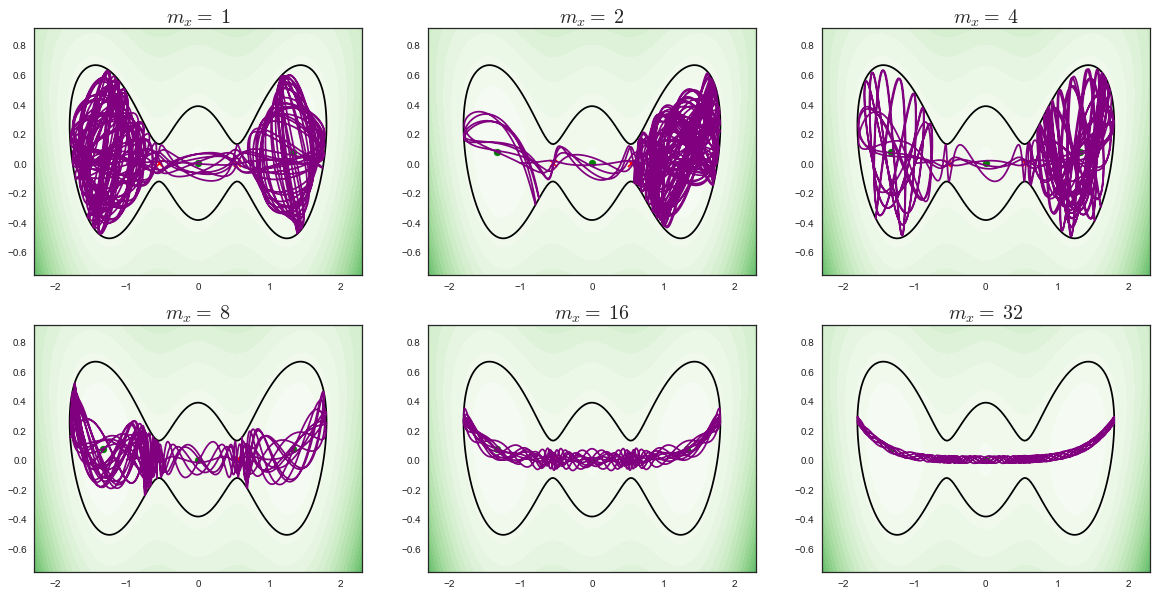

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
# fig.suptitle("Example Trajectories of Gezelter Miller potential for varying masses", fontsize = 20)
axes = axes.ravel()

energy_levels = np.linspace(-0.001, 0.03, 30)
energy_level = 0.00075

runtime = 5000
x_masses = [1, 2, 4, 8, 16, 32]

for i in range(len(x_masses)):
    masses = [x_masses[i], 1]
    state0 = [-1, 0, np.sqrt(2*masses[0]*(energy_level - gm.potential_energy(-1, 0, params_pe))), 0]

    b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.5, y_padding = 0.25)
    x_mesh, y_mesh, potential_mesh = gm.meshes(b_box, params_pe)
    axes[i].set_title("$m_x=\;{}$".format(x_masses[i]), fontsize = 20)
    axes[i].set_xlim(b_box[0,:])
    axes[i].set_ylim(b_box[1,:])

    axes[i].contour(x_mesh, y_mesh, potential_mesh, levels = [energy_level], colors=['k'])
    axes[i].contourf(x_mesh, y_mesh, potential_mesh, levels = energy_levels, cmap = 'Greens')
    
    gm.plot_example_traj(axes[i], state0, runtime, masses, params_pe)
    
    axes[i].scatter(centre_centres[:,0],centre_centres[:,1], c='g', marker = 'o', label = 'centre-centre')
    axes[i].scatter(centre_saddles[:,0],centre_saddles[:,1], c='r', marker = 'x', label = 'centre-saddle')

fig.savefig(plots_filename+"eg_trajectories")
plt.show()

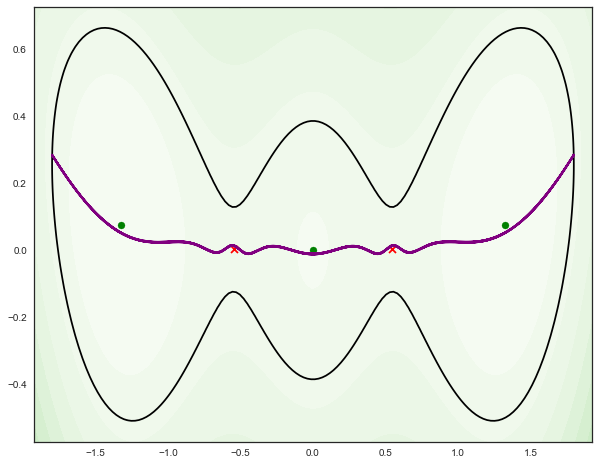

In [64]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))


contour_energy_levels = np.linspace(-0.001, 0.03, 30)

runtime = 5000
masses = [16, 1]

x0 = 0
y0 = -0.01
energy_level = 0.00075

state0 = [x0, y0, np.sqrt(2*masses[0]*(energy_level - gm.potential_energy(x0, y0, params_pe))), 0]


energy_level = gm.total_energy(state0, masses, params_pe)

b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.125, y_padding = 0.0625)
x_mesh, y_mesh, potential_mesh = gm.meshes(b_box, params_pe)
ax.set_xlim(b_box[0,:])
ax.set_ylim(b_box[1,:])

ax.contour(x_mesh, y_mesh, potential_mesh, levels = [energy_level], colors=['k'])
ax.contourf(x_mesh, y_mesh, potential_mesh, levels = contour_energy_levels, cmap = 'Greens')

gm.plot_example_traj(ax, state0, runtime, masses, params_pe)

ax.scatter(centre_centres[:,0],centre_centres[:,1], c='g', marker = 'o', label = 'centre-centre')
ax.scatter(centre_saddles[:,0],centre_saddles[:,1], c='r', marker = 'x', label = 'centre-saddle')

fig.savefig(plots_filename+"stable_manifold")
plt.show()

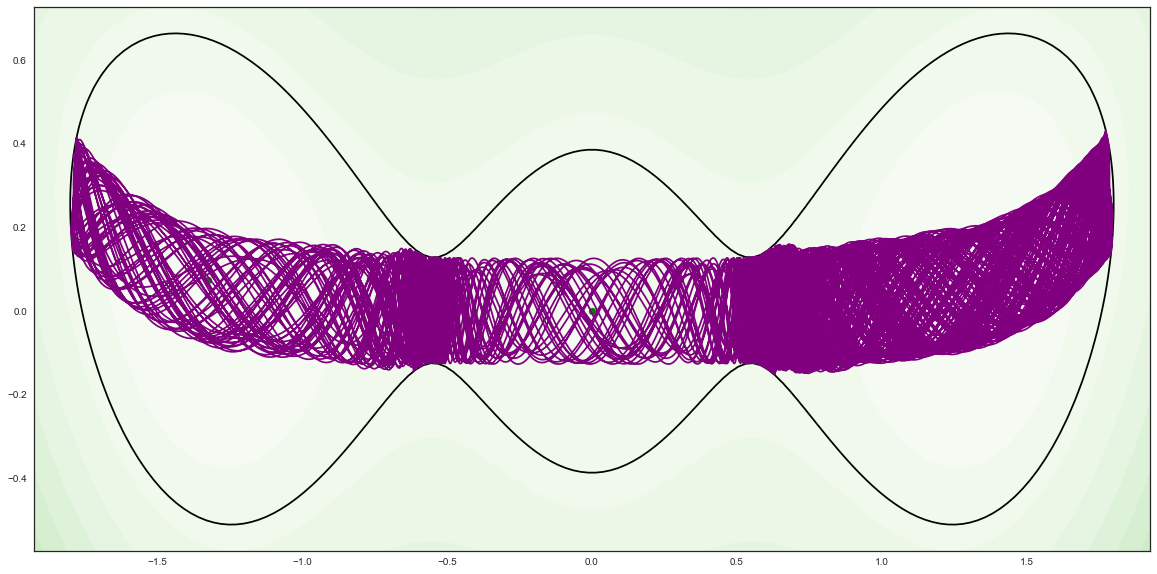

In [63]:
fig, ax = plt.subplots(1,1, figsize = (20, 10))

contour_energy_levels = np.linspace(-0.001, 0.03, 30)

runtime = 50000
masses = [16, 1]

x0 = -0.54
y0 = 0.12
energy_level = 0.00075

state0 = [x0, y0,0, -np.sqrt(2*masses[1]*(energy_level - gm.potential_energy(x0, y0, params_pe)))]


energy_level = gm.total_energy(state0, masses, params_pe)

b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.125, y_padding = 0.0625)
x_mesh, y_mesh, potential_mesh = gm.meshes(b_box, params_pe)
ax.set_xlim(b_box[0,:])
ax.set_ylim(b_box[1,:])

ax.contour(x_mesh, y_mesh, potential_mesh, levels = [energy_level], colors=['k'])
ax.contourf(x_mesh, y_mesh, potential_mesh, levels = contour_energy_levels, cmap = 'Greens')

gm.plot_example_traj(ax, state0, runtime, masses, params_pe)

ax.scatter(centre_centres[:,0],centre_centres[:,1], c='g', marker = 'o', label = 'centre-centre')
ax.scatter(centre_saddles[:,0],centre_saddles[:,1], c='r', marker = 'x', label = 'centre-saddle')

fig.savefig(plots_filename+"stable_manifold")
plt.show()

## 3D plot

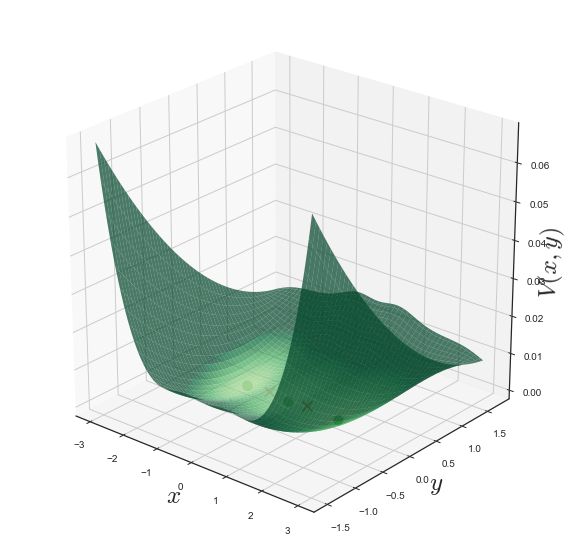

In [124]:
b_box = np.array([[-3.0, 3.0],[-1.5, 1.7]])
x_mesh, y_mesh, potential_mesh = gm.meshes(b_box, params_pe)

fig = plt.figure(figsize = (10,10))
ax = plt.gca(projection='3d')

ax.set_zlim3d(np.min(potential_mesh),np.max(potential_mesh))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$V(x,y)$')
ax.view_init(25, -50)

ax.plot_surface(x_mesh, y_mesh, potential_mesh, cmap = 'YlGn', vmin = -0.005, vmax = 0.005, alpha = 0.7)
ax.scatter(centre_centres[:,0], centre_centres[:,1], [e_centres, 0, e_centres], marker = 'o', s = 100, c = 'g')
ax.scatter(centre_saddles[1:3,0], centre_saddles[1:3,1], e_saddle2, marker = 'x', s = 100, c = 'r')

plt.show()